<a href="https://colab.research.google.com/github/Raflin24/Proyek-Analisis-Data/blob/main/Proyek_Analisis_Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muhammad Rafli]
- **Email:** [raflinsheon04@gmail.com]
- **ID Dicoding:** [Muhammad Rafli]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren terakhir terkait jumlah pengguna baru dengan pengguna casual dalam beberapa tahun terakhir?
- Bagaimana pola yang terjadi pada jumlah total penyewaan sepeda pada bulan dan waktu tertentu ?
-Seberapa signifikan jumlah penyewaan sepeda pada saat hari kerja dibanding dengan hari libur ?
-Faktor lingkungan apa saja yang dapat mempengaruhi jumlah penyewaan sepeda ?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

Membuat dataframe bike_day_df yang berisikan isi dari file day.csv terkait bike sharing counts aggregated on daily basis

In [4]:
import pandas as pd
relative_path = "/content/drive/MyDrive/day.csv"
bike_day_df = pd.read_csv(relative_path)
bike_day_df.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
import pandas as pd
relative_path = "/content/drive/MyDrive/day.csv"
bike_hour_df = pd.read_csv(relative_path)
bike_hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membuat dataframe bike_hour_df yang berisikan isi dari file hour.csv terkait bike sharing counts aggregated on hourly basis

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Assessing Data

In [11]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [25]:
import pandas as pd
path = "/content/drive/MyDrive/day.csv"
day = pd.read_csv(path)
print(day)
day.isna().sum()


     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0      

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [26]:
print("Jumlah duplikasi: ",day.duplicated().sum())
day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [27]:
day.duplicated().sum()

0

In [28]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Missing Value


In [29]:
day.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Exploratory Data Analysis (EDA)

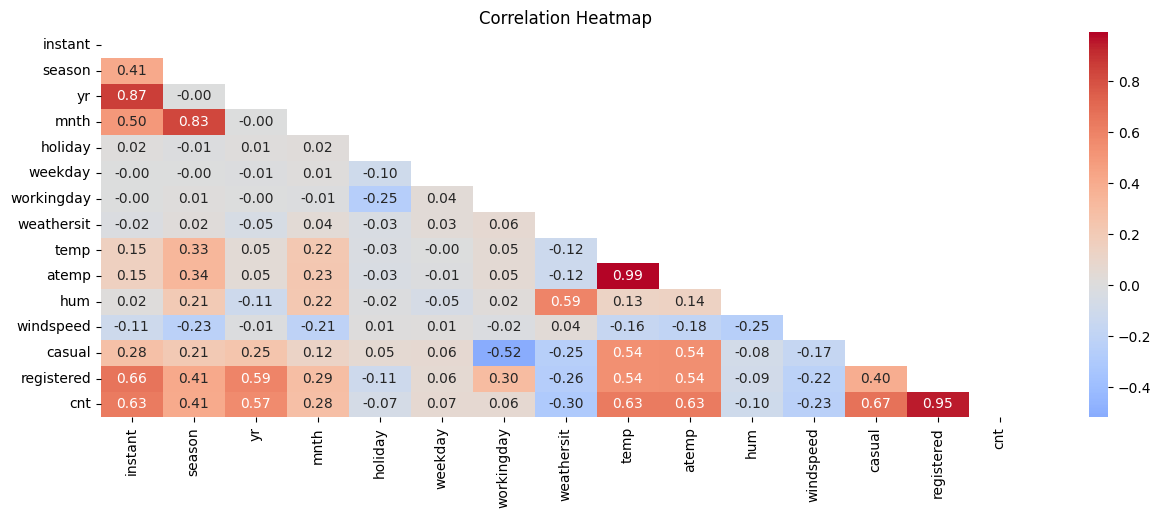

In [30]:
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = bike_day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


berikut fitur yang memiliki korelasi positive yang kuat yaitu
"temp" dengan "atemp"
"cnt" dengan "registered"
"instant" dengan "yr"
"season" dengan "mnth"
fitur yang memiliki korelasi yang kuat dengan total sepeda sewa termasuk baik yang sewa harian maupun yang terdaftar ("cnt") yaitu
"registered"
"casual"
"atemp"
"temp"
"instant"
Semakin warnanya membiru berati antar kedua fitur tersebut tidak memiliki relasi

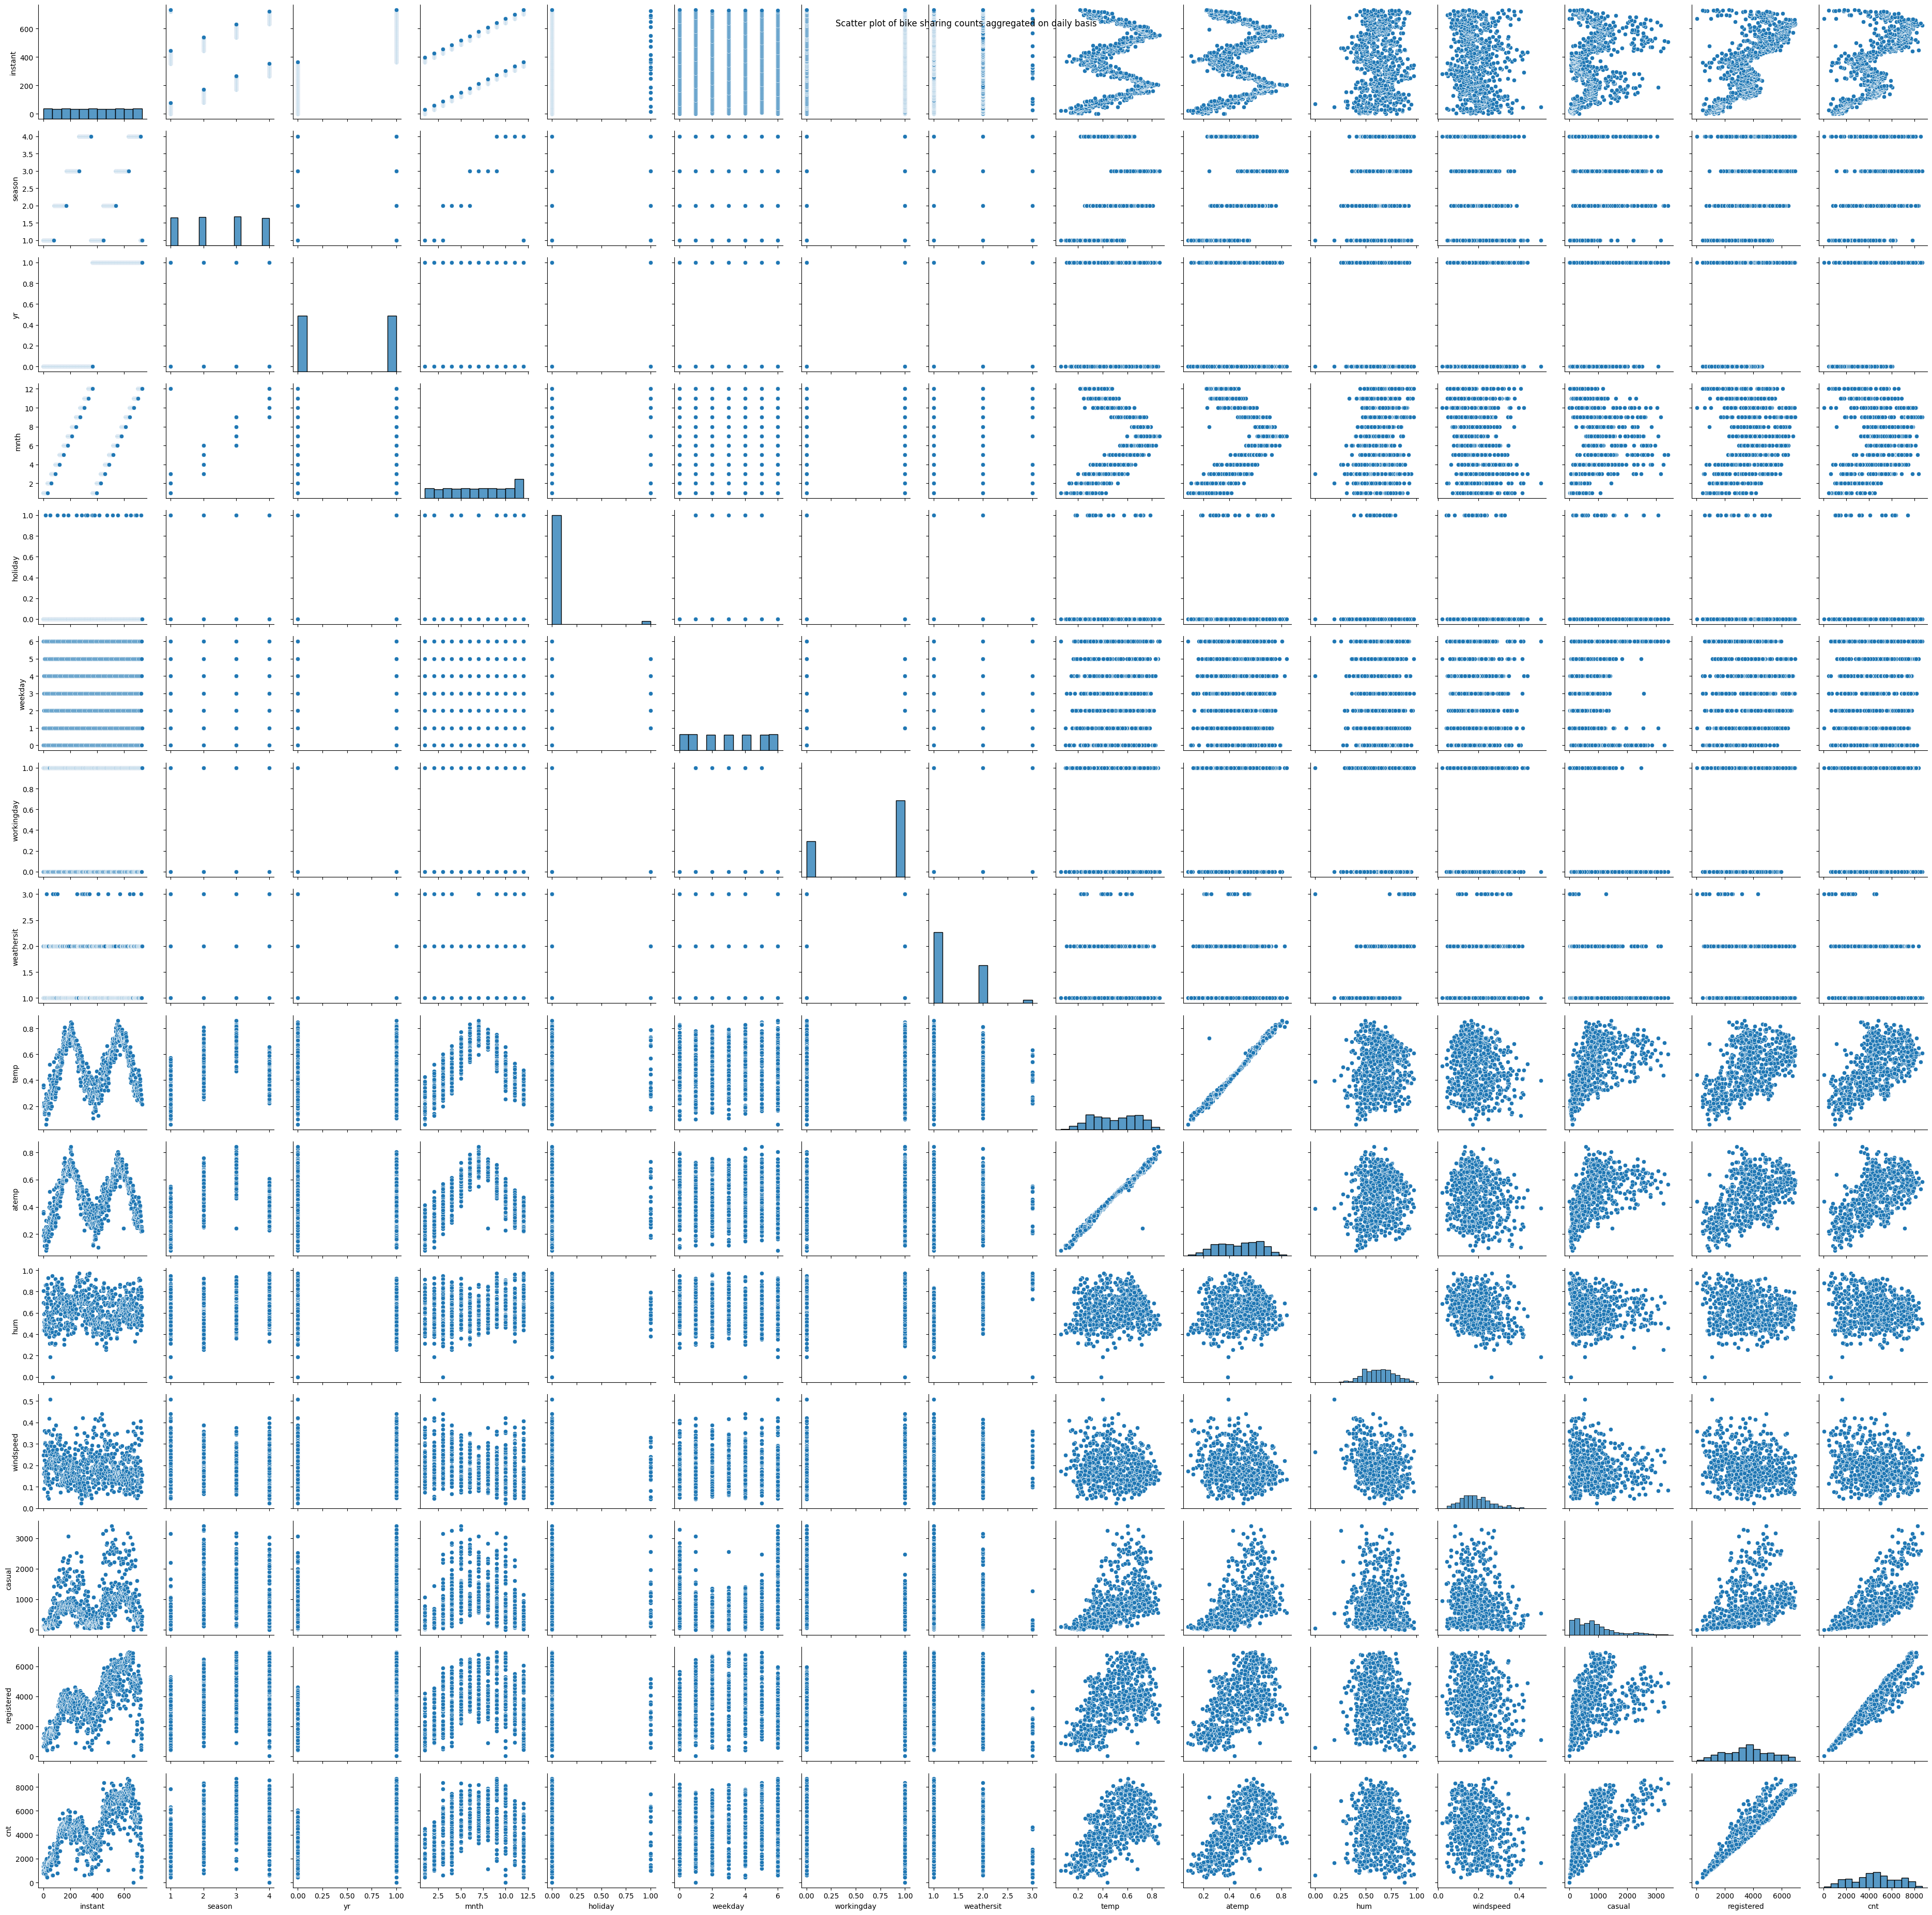

In [ ]:
g = sns.pairplot(bike_day_df)
g.fig.suptitle("Scatter plot of bike sharing counts aggregated on daily basis")
plt.tight_layout()
plt.show()

In [31]:
bike_day_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

In [32]:
daily_categorical_data = bike_day_df[["season","yr","holiday","workingday","weekday","weathersit"]]

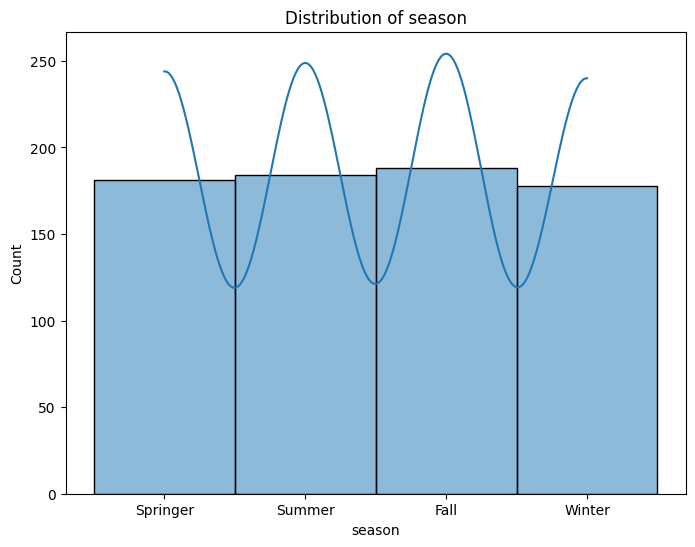

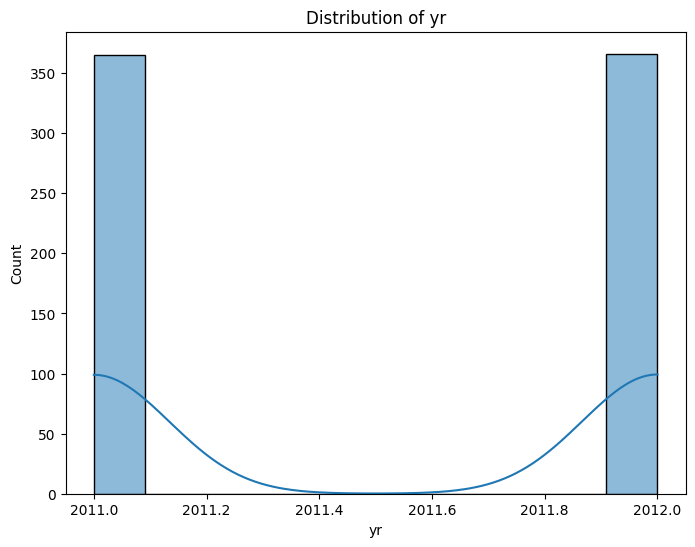

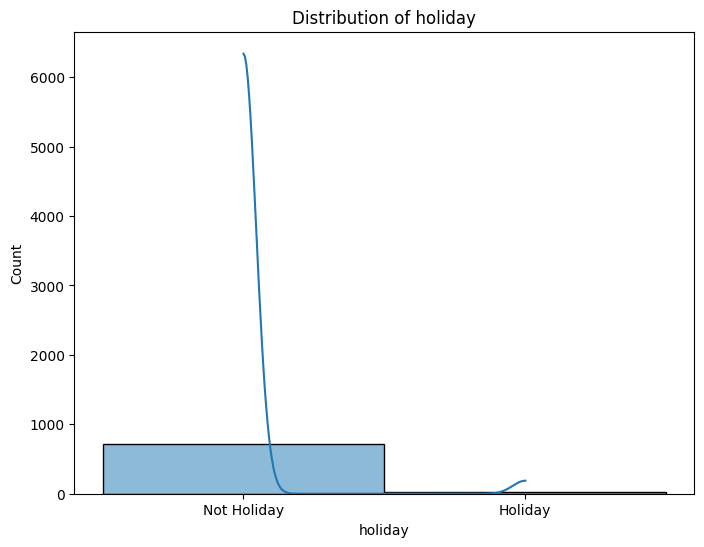

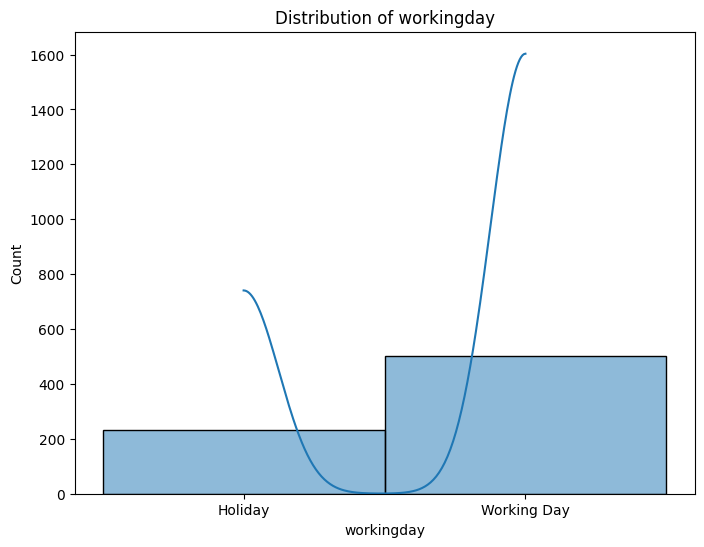

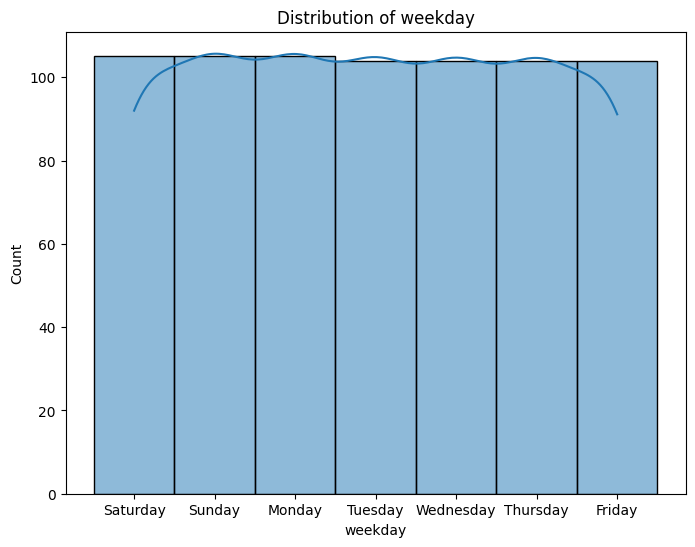

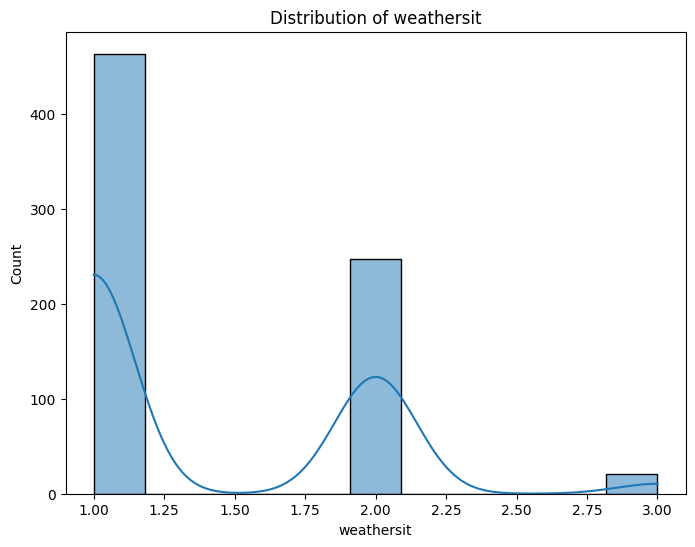

In [33]:
for column in daily_categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(daily_categorical_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [ ]:
bike_day_df["temp"] = bike_day_df["temp"].multiply(41)
bike_day_df["atemp"] = bike_day_df["atemp"].multiply(50)
bike_day_df["hum"] = bike_day_df["hum"].multiply(100)
bike_day_df["windspeed"] = bike_day_df["windspeed"].multiply(67)

In [ ]:
daily_num_data = bike_day_df[["temp","atemp","hum","windspeed"]]

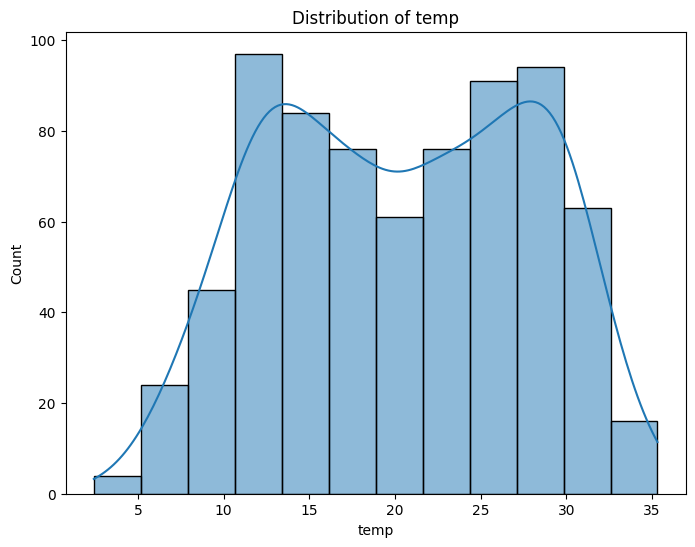

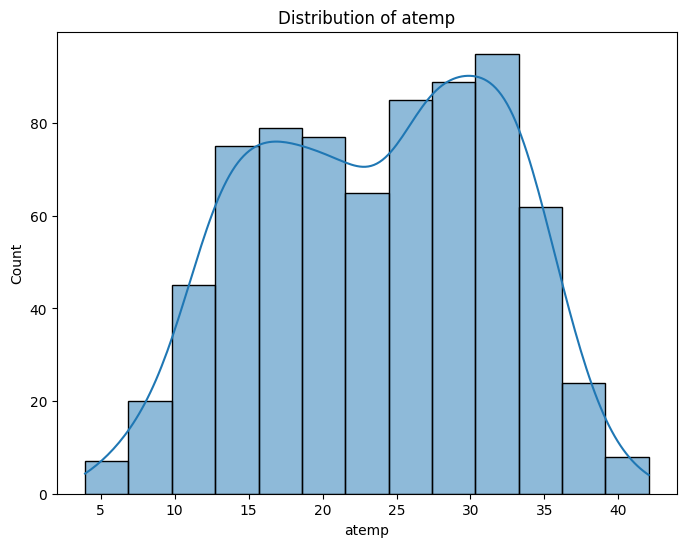

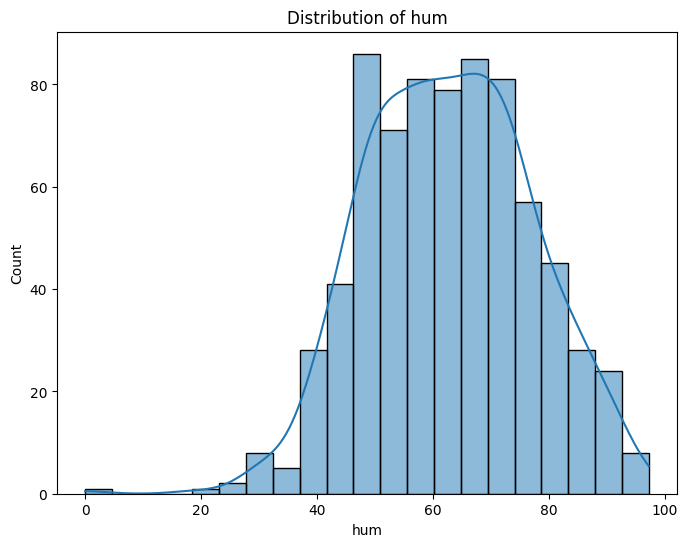

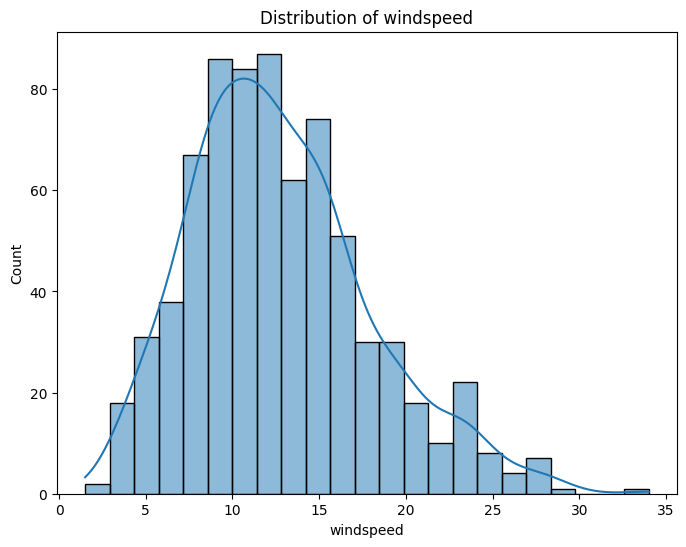

In [ ]:
for column in daily_num_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(daily_num_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

Exploration on the "bike_hour_df"


### Pertanyaan 1:Bagaimana pola yang terjadi pada jumlah total penyewaan sepeda pada bulan dan waktu tertentu ?

In [34]:
casual_year_counts = bike_day_df.groupby("yr")["casual"].sum()
casual_year_counts = casual_year_counts.reset_index()
casual_year_counts.columns = ["yr", "total_casual"]

In [35]:
casual_year_counts

,yr,total_casual
0,2011,247252
1,2012,372765


In [36]:
reg_year_counts = bike_day_df.groupby("yr")["registered"].sum()
reg_year_counts = reg_year_counts.reset_index()
reg_year_counts.columns = ["yr", "total_registered"]

In [37]:
reg_year_counts


,yr,total_registered
0,2011,995851
1,2012,1676811


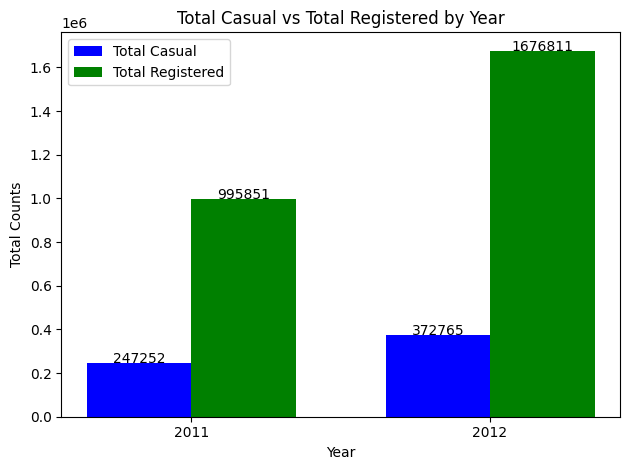

In [38]:
index = casual_year_counts["yr"]
bar_width = 0.35

p1 = plt.bar(index, casual_year_counts["total_casual"], bar_width, label="Total Casual", color="b")
p2 = plt.bar(index + bar_width, reg_year_counts["total_registered"], bar_width, label="Total Registered", color="g")

plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.title("Total Casual vs Total Registered by Year")
plt.xticks(index + bar_width / 2, casual_year_counts["yr"])
plt.legend()
for p in p1 + p2:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 1, str(int(height)), ha="center")
plt.tight_layout()
plt.show()

### Pertanyaan 2:Bagaimana efek musim terhadap jumlah total penyewaan sepeda ?

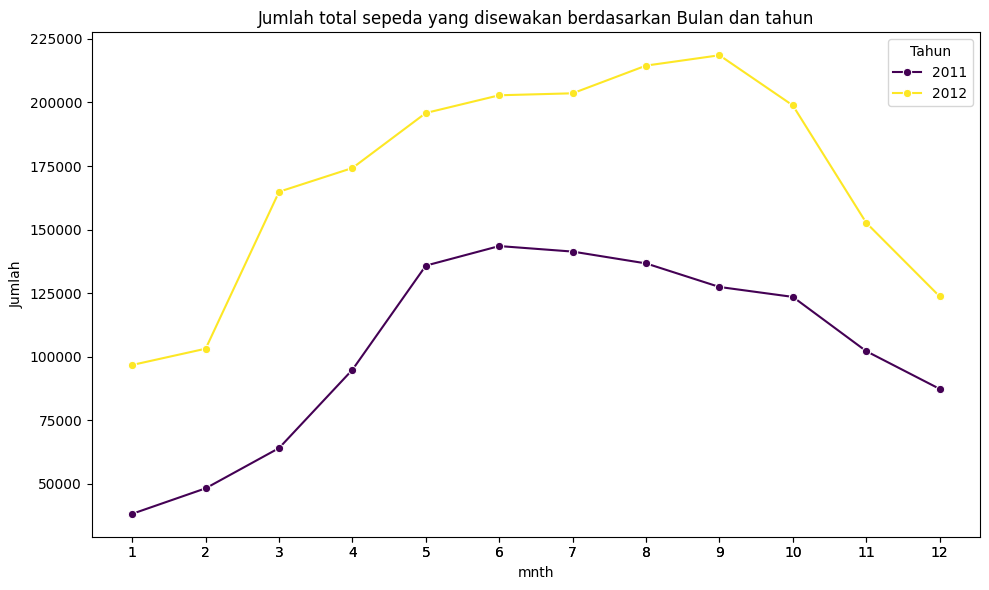

In [39]:
monthly_counts = bike_day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x="mnth", y="cnt", hue="yr", palette="viridis", marker="o")

plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.legend(title="Tahun", loc="upper right")
plt.xticks(ticks=monthly_counts["mnth"], labels=monthly_counts["mnth"])
plt.tight_layout()
plt.show()


Pertanyaan 3 :Seberapa signifikan jumlah penyewaan sepeda pada saat hari kerja dibanding dengan hari libur ?

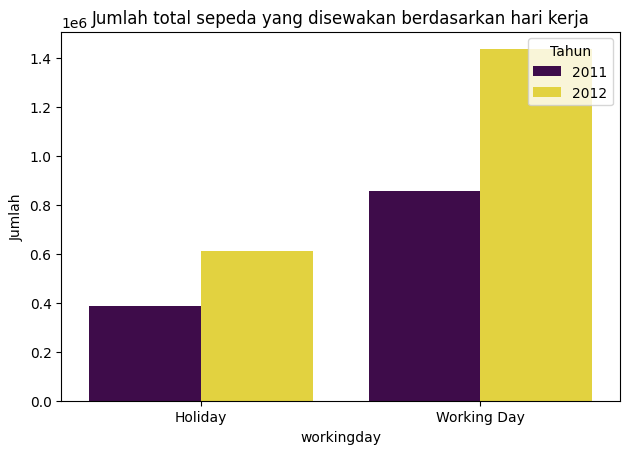

In [40]:
working_counts = bike_day_df.groupby(by=["workingday","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=working_counts, x="workingday", y="cnt", hue="yr", palette="viridis")
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan hari kerja")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Pertanyaan 7 :Faktor lingkungan apa saja yang dapat mempengaruhi jumlah penyewaan sepeda ?

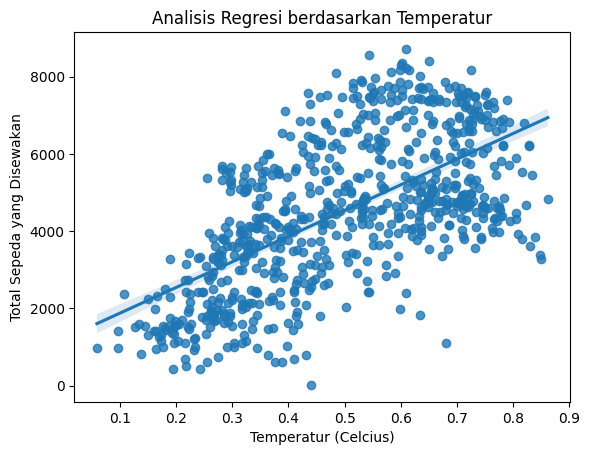

In [41]:
sns.regplot(x=bike_day_df["temp"], y=bike_day_df["cnt"])
plt.title("Analisis Regresi berdasarkan Temperatur")
plt.xlabel("Temperatur (Celcius)")
plt.ylabel("Total Sepeda yang Disewakan")
plt.show()

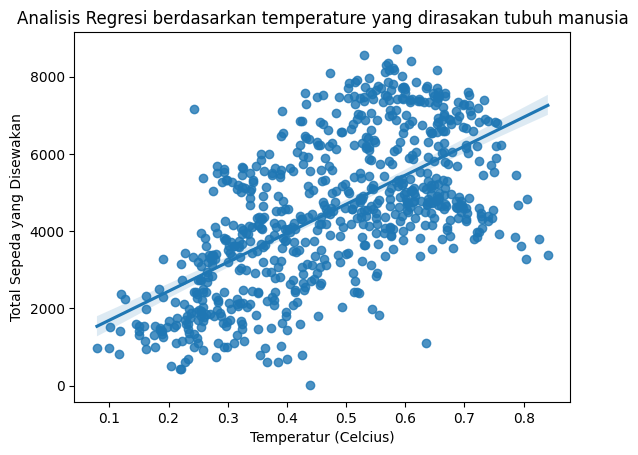

In [42]:
sns.regplot(x=bike_day_df["atemp"], y=bike_day_df["cnt"])
plt.title("Analisis Regresi berdasarkan temperature yang dirasakan tubuh manusia")
plt.xlabel("Temperatur (Celcius)")
plt.ylabel("Total Sepeda yang Disewakan")
plt.show()

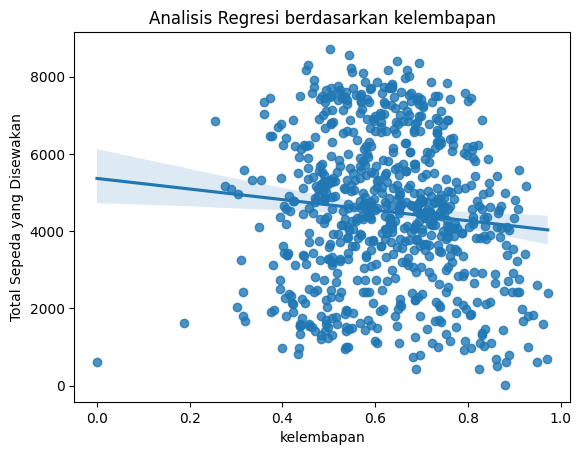

In [43]:
sns.regplot(x=bike_day_df["hum"], y=bike_day_df["cnt"])
plt.title("Analisis Regresi berdasarkan kelembapan")
plt.xlabel("kelembapan")
plt.ylabel("Total Sepeda yang Disewakan")
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan visualisasi data yang ditampilkan jumlah pengguna baru lebih banyak daripada pengguna casual yang sering menyewa sepeda baik ditahun 2011 dan 2012. Perbedaan pada tahun 2012 sangat signifikan dengan perbedaan sebanyak 1.304.046 antara pengguna baru dengan pengguna casual. Tren paling tinggi untuk penyewaan sepeda dimiliki oleh pengguna baru pada tahun 2012. Hal ini berdasarkan analisis pada dataframe bike_day_df
- Conclution pertanyaan 2 :Berdasarkan grafik yang ditampilkan dari analisis dataframe bike_day_df pada kolom mnth dapat disimpulkan pada bulan ke-9 atau September pada tahun 2012 memiliki jumlah penyewaan sepeda terbanyak selain itu jika pada tahun 2011 dengan jumlah penyewaan terbanyak terdapat pada bulan ke-6 atau Juni.
-Terjadi perbedaan yang sangat signifikan baik pada tahun 2011 dan 2012 pada hari biasa memiliki jumlah penyewaan sepeda lebih tinggi daripada hari libur hal ini didasari oleh visualisasi data pada dataframe bike_day_df maka dari itu hari biasa bukan hari libur memiliki faktor dalam penyewaan sepeda yang ada
-Berdasarkan visualisasi data pada dataframe bike_day_df, bisa kita simpulkan bahwa suhu temperature dan total penyewaan sepeda yang digunakan memiliki hubungan yang positif selain itu juga terdapat bahwa suhu temperature yang dirasakan pada tubuh manusia (atemp) dan jumlah penggunaan bike sharing memiliki hubungan yang positif. Pada faktor kelembapan (hum) memiliki pengaruh pada rentang 40-85%, faktor kecepatan angin (windspeed) memiliki pengaruh pada kecepatan rentang 3-20 km/jam berdasarkan dengan jumlah penyewaan sepeda yang ada